In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

Job Title               Salary Estimate  \
0  Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1     Data Scientist  $137K-$171K (Glassdoor est.)   
2     Data Scientist  $137K-$171K (Glassdoor est.)   
3     Data Scientist  $137K-$171K (Glassdoor est.)   
4     Data Scientist  $137K-$171K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

              Company Name       Location            Headquarters  \
0         Healthfirst\n3.1   New York, NY            New York, NY   
1             ManTech\n4.2  Chantilly, VA             Herndon, VA   
2      Analysis Group\n3.8     Boston, MA              Boston, MA   
3             INFICON\n3.5     Newton, MA  Bad Ragaz, Switzerland   
4  Affinity Solutions\n2.9   New York, NY            New York, NY   

                      Size  Founded        Type of ownership  ... Remote  \
0   1001 to 5000 employees     1993   Nonprofit Organization  ...      0   
1  5001 to 10000 employees     1968         Company - Public  ...      0   
2   1001 to 5000 employees     1981  Private Practice / Firm  ...      0   
3    501 to 1000 employees     2000         Company - Public  ...      0   
4      51 to 200 employees     1998        Company - Private  ...      0   

  job_state same_state age  python_yn  rstudio_yn  spark aws  excel powerBI  
0        NY          1  28          0           0      0   1      0       0  
1        VA          0  53          0           0      0   0      0       0  
2        MA          1  40          1           0      0   1      1       0  
3        MA          0  21          1           0      0   1      1       0  
4        NY          1  23          1           0      0   0      1       0  

[5 rows x 28 columns]

In [4]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [5]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [6]:

df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        576
senior     94
jr          2
Name: seniority, dtype: int64

In [7]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      3389
1      4076
2      8749
3      3349
4      2728
       ... 
667    3653
668    1251
669    2793
670    3426
671    3000
Name: desc_len, Length: 672, dtype: int64

In [8]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [9]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'Remote',
       'job_state', 'same_state', 'age', 'python_yn', 'rstudio_yn', 'spark',
       'aws', 'excel', 'powerBI', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [10]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'Remote',
       'job_state', 'same_state', 'age', 'python_yn', 'rstudio_yn', 'spark',
       'aws', 'excel', 'powerBI', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [11]:
df.company_txt

0               Healthfirst\n
1                   ManTech\n
2            Analysis Group\n
3                   INFICON\n
4        Affinity Solutions\n
                ...          
667                TRANZACT\n
668                      JKGT
669                AccessHope
670    ChaTeck Incorporated\n
671           1-800-Flowers\n
Name: company_txt, Length: 672, dtype: object

In [12]:
df['company_txt']=df.company_txt.apply(lambda x: x.replace('\n',''))

In [13]:
df.company_txt

0               Healthfirst
1                   ManTech
2            Analysis Group
3                   INFICON
4        Affinity Solutions
               ...         
667                TRANZACT
668                    JKGT
669              AccessHope
670    ChaTeck Incorporated
671           1-800-Flowers
Name: company_txt, Length: 672, dtype: object

In [14]:
df.describe()

Rating      Founded  min_salary  max_salary  avg_salary  \
count  672.000000   672.000000  672.000000  672.000000  672.000000   
mean     3.518601  1635.529762   99.196429  148.130952  123.663690   
std      1.410329   756.746640   33.009958   48.035110   39.580268   
min     -1.000000    -1.000000   31.000000   56.000000   43.500000   
25%      3.300000  1917.750000   79.000000  119.000000  103.000000   
50%      3.800000  1995.000000   91.000000  133.000000  114.000000   
75%      4.300000  2009.000000  122.000000  165.000000  136.500000   
max      5.000000  2019.000000  212.000000  331.000000  271.500000   

           Remote  same_state         age   python_yn  rstudio_yn       spark  \
count  672.000000  672.000000  672.000000  672.000000  672.000000  672.000000   
mean     0.008929    0.400298   30.241071    0.730655    0.001488    0.281250   
std      0.094138    0.490324   39.626628    0.443950    0.038576    0.449944   
min      0.000000    0.000000   -1.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    6.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000   17.000000    1.000000    0.000000    0.000000   
75%      0.000000    1.000000   38.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000  240.000000    1.000000    1.000000    1.000000   

              aws       excel     powerBI      desc_len    num_comp  
count  672.000000  672.000000  672.000000    672.000000  672.000000  
mean     0.258929    0.440476    0.071429   3484.638393    0.700893  
std      0.438373    0.496814    0.257731   1625.457082    1.227407  
min      0.000000    0.000000    0.000000     71.000000    0.000000  
25%      0.000000    0.000000    0.000000   2412.750000    0.000000  
50%      0.000000    0.000000    0.000000   3349.000000    0.000000  
75%      1.000000    1.000000    0.000000   4301.000000    1.000000  
max      1.000000    1.000000    1.000000  10524.000000    3.000000

<AxesSubplot:>

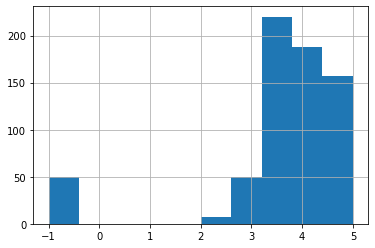

In [15]:
df.Rating.hist()

<AxesSubplot:>

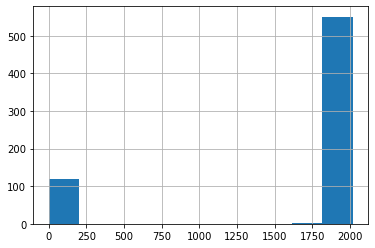

In [16]:
df.Founded.hist()

<AxesSubplot:>

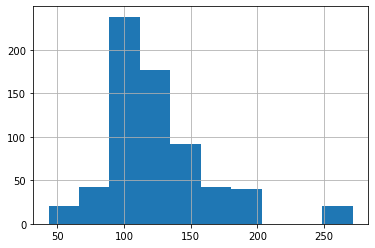

In [17]:
df.avg_salary.hist()

<AxesSubplot:>

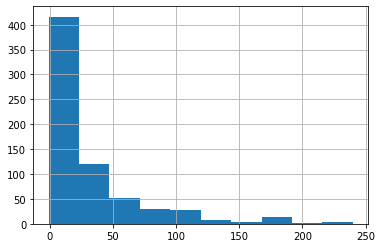

In [18]:
df.age.hist()

In [19]:
df.desc_len()

TypeError: 'Series' object is not callable

In [ ]:
df.desc_len.hist()

In [ ]:
df.boxplot(column = ['age','desc_len','avg_salary','Rating']) #They are not normalised, it makes no sens ndirou desc_len m3ahoum f boxplot

In [ ]:
df.boxplot(column = ['age','avg_salary','Rating']) #same for rating

In [ ]:
df.boxplot(column = ['Rating']) 

In [ ]:
df.Rating.value_counts()

In [ ]:
df[['age','avg_salary','Rating','desc_len']].corr() #from correlation we can notice that companies with more age have longer description len

In [ ]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})  #hadchi koulou copier-coller mn documentation : seaborn heatmap
#those with stronger correlation are the ones with darker color

In [21]:
df.columns #let's work on categorical variables now (non numeric)

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'Remote',
       'job_state', 'same_state', 'age', 'python_yn', 'rstudio_yn', 'spark',
       'aws', 'excel', 'powerBI', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [23]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'python_yn', 'rstudio_yn',
       'spark', 'aws', 'excel','powerBI', 'job_simp', 'seniority']]

In [27]:
df_cat['job_state'].value_counts().index

Index(['CA', 'VA', 'MA', 'NY', 'MD', 'IL', 'DC', 'TX', 'WA', 'OH', 'PA', 'MO',
       'NJ', 'CO', 'NC', 'GA', 'FL', 'TN', 'WI', 'OK', 'UT', 'IN', 'MI', 'MN',
       'CT', 'AL', 'AZ', 'NE', 'IA', 'SC', 'OR', 'RI', 'NH', 'KS', 'DE', 'WV',
       'LA', 'MS'],
      dtype='object')

graph for Location: total = 207


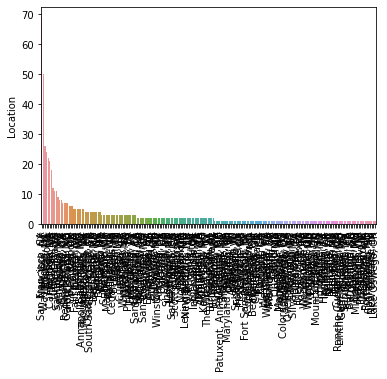

graph for Headquarters: total = 229


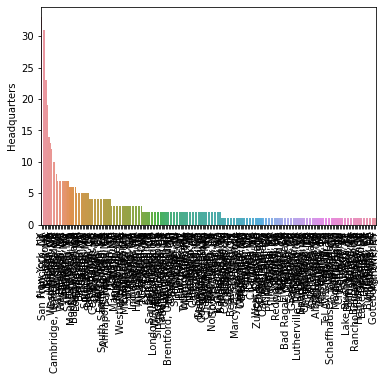

graph for Size: total = 9


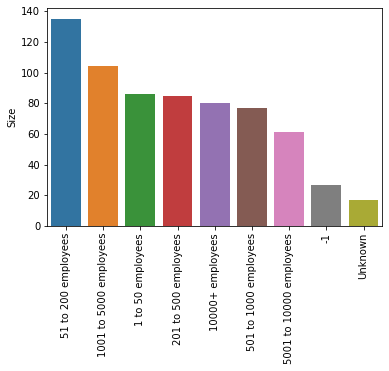

graph for Type of ownership: total = 13


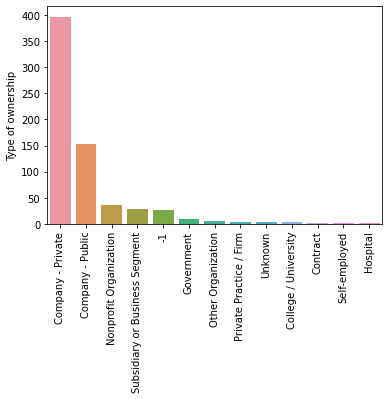

graph for Industry: total = 58


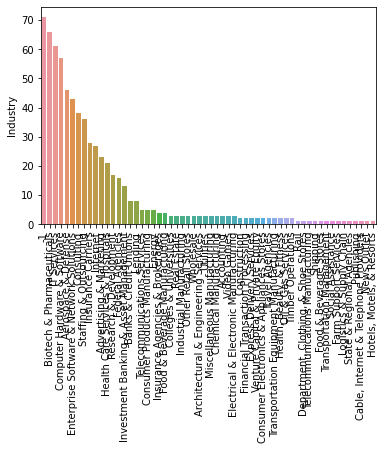

graph for Sector: total = 23


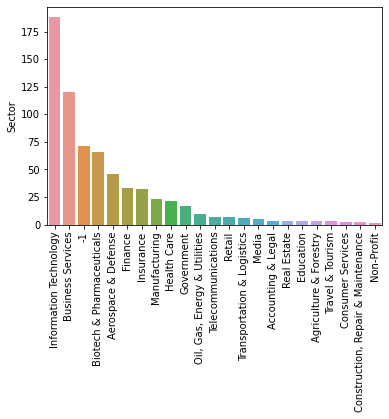

graph for Revenue: total = 14


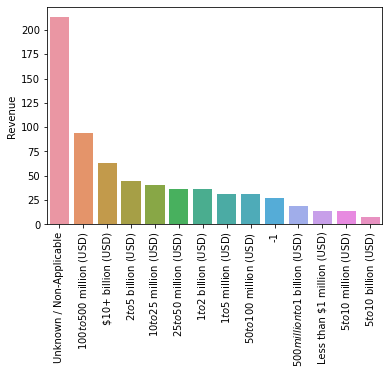

graph for company_txt: total = 432


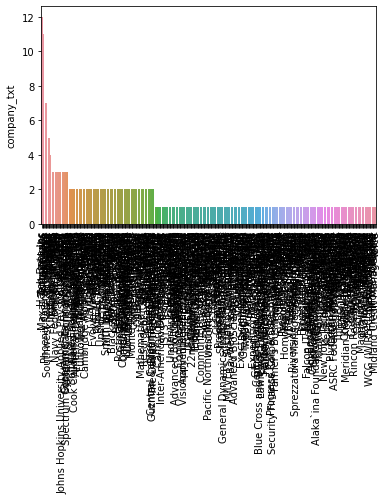

graph for job_state: total = 38


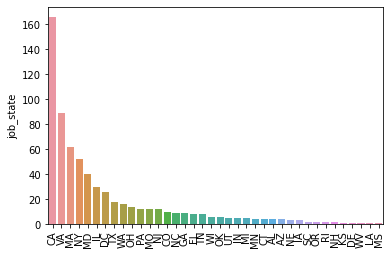

graph for same_state: total = 2


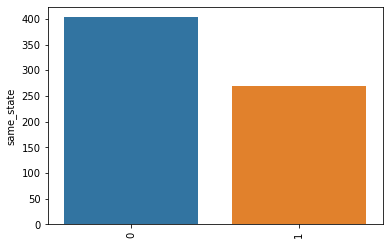

graph for python_yn: total = 2


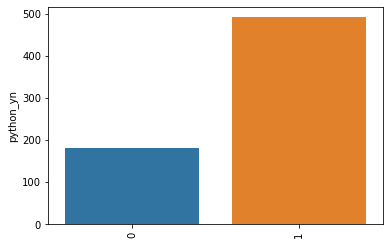

graph for rstudio_yn: total = 2


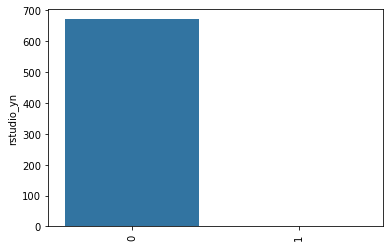

graph for spark: total = 2


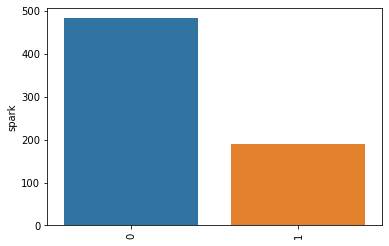

graph for aws: total = 2


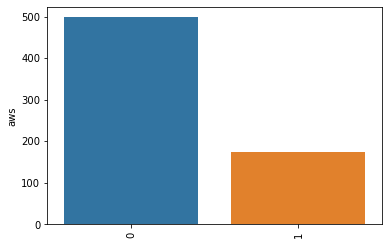

graph for excel: total = 2


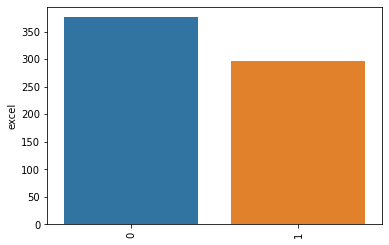

graph for powerBI: total = 2


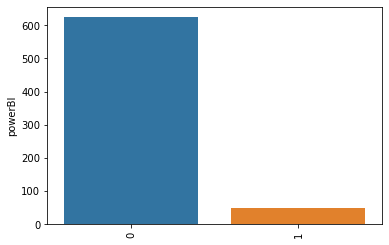

graph for job_simp: total = 7


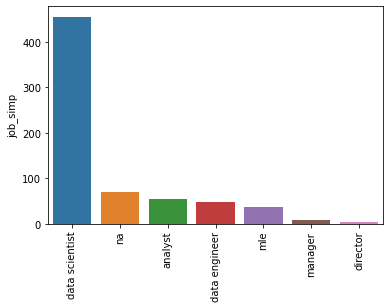

graph for seniority: total = 3


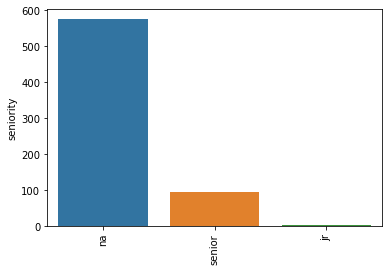

In [32]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


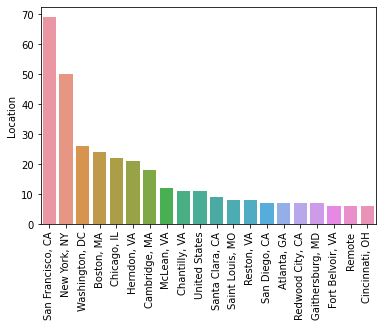

graph for Headquarters: total = 20


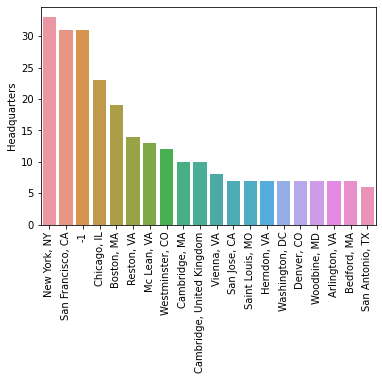

graph for company_txt: total = 20


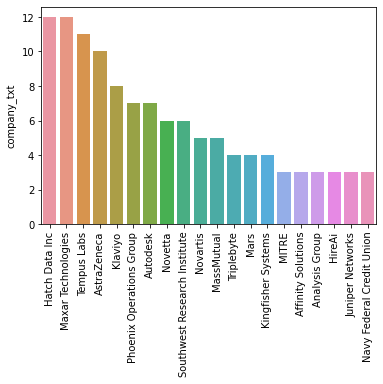

In [37]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [41]:
pd.pivot_table(df, index = ['job_simp','seniority'], values='avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          76.500000
               na         116.297297
               senior     116.764706
data engineer  jr         103.000000
               na         114.475000
               senior     111.166667
data scientist na         125.701733
               senior     121.372549
director       na         120.500000
               senior     130.750000
manager        na         141.166667
               senior     120.500000
mle            na         114.000000
               senior     126.944444
na             na         125.713115
               senior     147.062500

In [49]:
pd.pivot_table(df, index = 'job_state', values='avg_salary').sort_values('avg_salaray',ascending=False)

avg_salary
job_state            
DE         271.500000
NC         150.111111
WI         144.416667
AZ         140.875000
IA         140.833333
DC         139.500000
NY         136.432692
WA         134.781250
TX         133.888889
MS         133.000000
OR         132.000000
NH         132.000000
AL         131.125000
RI         130.750000
VA         126.769663
PA         125.833333
OK         122.916667
MA         121.967742
OH         121.714286
IL         120.883333
CA         120.521084
NJ         120.416667
MI         119.000000
FL         118.437500
MO         114.958333
WV         114.000000
IN         113.400000
MD         112.375000
GA         109.666667
NE         107.666667
UT         106.700000
CO         103.650000
KS         103.000000
LA         103.000000
TN         102.187500
CT          98.125000
SC          96.000000
MN          94.000000

In [50]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)


avg_salary
job_state job_simp                  
WV        data scientist      114.00
WI        na                  136.50
          data scientist      144.00
          analyst             154.00
WA        mle                 192.75
...                              ...
AZ        data scientist      147.00
          data engineer       115.50
AL        na                  142.25
          data scientist      107.00
          data engineer       133.00

[106 rows x 1 columns]

In [51]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [52]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WV        data scientist           1
WI        na                       1
          data scientist           4
          analyst                  1
WA        mle                      2
          data scientist          13
          analyst                  1
VA        data scientist          66
          data engineer            5
          analyst                  8
          mle                      5
          na                       5
UT        data scientist           3
          data engineer            2
TX        na                       2
          data scientist          13
          analyst                  3
TN        mle                      1
          data scientist           5
          analyst                  2
SC        na                       1
          analyst                  1
RI        director                 2
PA        mle                      2
          analyst                  4
          data scientist           5
          na                       1
OR        mle                      1
          data scientist           1
OK        na                       4
          analyst                  2
OH        na                       2
          mle                      1
          data scientist           9
          data engineer            2
NY        data engineer            4
          data scientist          41
          analyst                  1
          mle                      3
          na                       3
NJ        na                       1
          data scientist          10
          analyst                  1
NH        mle                      1
          data scientist           1
NE        data scientist           2
          analyst                  1
NC        mle                      2
          manager                  1
          data engineer            1
          na                       3
          data scientist           1
          analyst                  1
MS        na                       1
MO        data scientist           9
          data engineer            2
          analyst                  1
MN        data scientist           1
          analyst                  3
MI        manager                  1
          data scientist           4
MD        na                       8
          data scientist          27
          data engineer            3
          analyst                  2
MA        director                 1
          analyst                  1
          data scientist          37
          na                      19
          manager                  1
          mle                      3
LA        analyst                  1
KS        data scientist           1
IN        na                       1
          data scientist           1
          data engineer            1
          analyst                  2
IL        data engineer            2
          analyst                  3
          mle                      3
          na                       3
          data scientist          19
IA        analyst                  3
GA        data scientist           9
FL        na                       2
          data scientist           2
          data engineer            4
DE        data scientist           1
DC        data scientist          25
          analyst                  1
CT        data scientist           2
          data engineer            2
CO        mle                      1
          data scientist           9
CA        na                       8
          mle                      9
          manager                  4
          data scientist         118
          data engineer           15
          analyst                 12
AZ        na                       1
          data scientist           2
          data engineer            1
AL        na                       2
          data scientist           1
          data engineer            1

In [53]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

avg_salary
job_state            
DE         271.500000
NH         161.000000
AZ         147.000000
WI         144.000000
NY         141.707317
DC         139.760000
PA         136.800000
NC         136.000000
TX         135.192308
WA         128.153846
VA         127.143939
FL         125.500000
CA         124.199153
MI         123.875000
NJ         123.500000
IL         122.789474
MD         117.370370
MA         116.432432
WV         114.000000
MO         113.111111
UT         111.500000
OH         111.388889
NE         110.000000
GA         109.666667
IN         107.000000
AL         107.000000
MN         106.000000
KS         103.000000
CO         102.333333
TN         102.000000
OR          99.500000
CT          94.750000

In [56]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of onwership
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'Remote',
       'job_state', 'same_state', 'age', 'python_yn', 'rstudio_yn', 'spark',
       'aws', 'excel', 'powerBI', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [58]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'Remote', 'python_yn', 'rstudio_yn', 'powerBI', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [61]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary',ascending=False))

Rating
        avg_salary
Rating            
 2.0    148.000000
 2.7    145.200000
-1.0    134.660000
 2.3    133.000000
 3.5    131.051724
 3.4    130.387097
 4.5    129.421875
 3.8    127.538462
 3.6    126.854839
 4.1    126.360000
 4.2    125.827586
 3.2    124.333333
 4.6    124.000000
 3.9    123.725000
 4.4    122.229167
 4.8    121.550000
 5.0    121.041667
 4.7    120.772727
 4.0    120.097561
 3.3    119.731707
 4.3    117.285714
 3.1    115.708333
 2.5    114.250000
 3.7    110.552632
 4.9    108.272727
 3.0    107.071429
 2.1    106.000000
 2.8    103.833333
 2.6    103.375000
 2.9    103.071429
 2.2    103.000000
 2.4     99.500000
Industry
                                          avg_salary
Industry                                            
Publishing                                271.500000
Health, Beauty, & Fitness                 203.750000
State & Regional Agencies                 183.000000
Hotels, Motels, & Resorts                 183.000000
Food & Beverage Stor

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [68]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [70]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

TypeError: imshow() missing 1 required positional argument: 'X'

<Figure size 720x720 with 0 Axes>